In [1]:
pip install yfinance

     |████████████████████████████████| 6.3MB 15.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=9950e607c02686cc1d51fd3f03f63033cbece8a60a6c4c95daeb5fffd1815173
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [12]:
# Import the python libraries
import pandas as pd
import numpy as np
import yfinance as yf
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lista_cryptos = ['BTC-USD']

Start = "2011-01-01"
End   = "2021-06-02"

data = yf.download(lista_cryptos, start=Start, end=End)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data.tail(3)

Date
2021-05-31    37332.855469
2021-06-01    36684.925781
2021-06-02    37575.179688
Name: Adj Close, dtype: float64

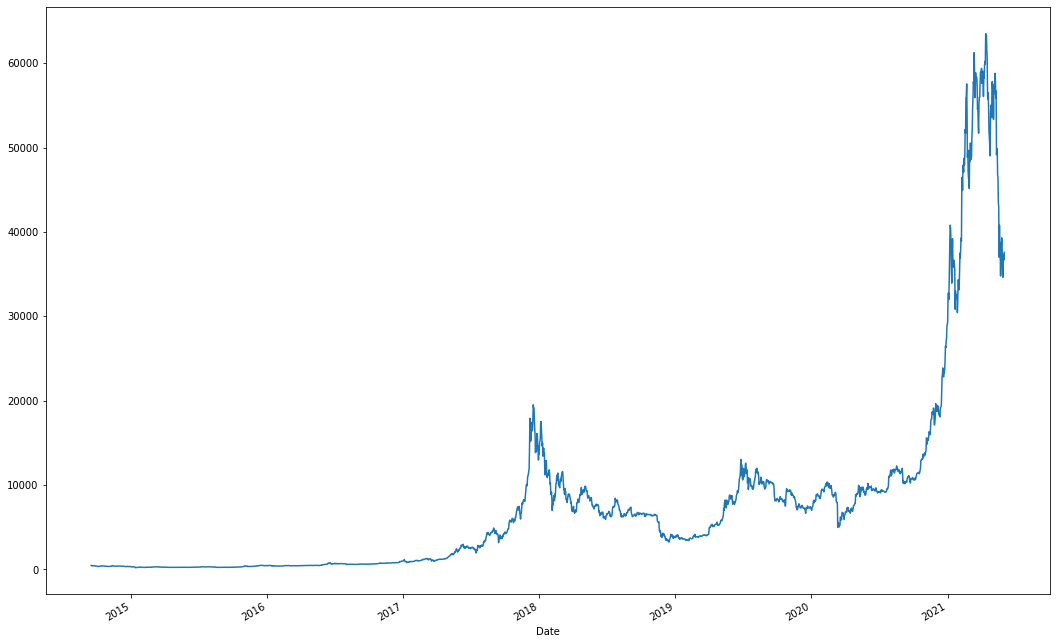

In [5]:
# Evolução do preço (Price evolution)
data.plot(figsize=(18, 12), subplots=True);

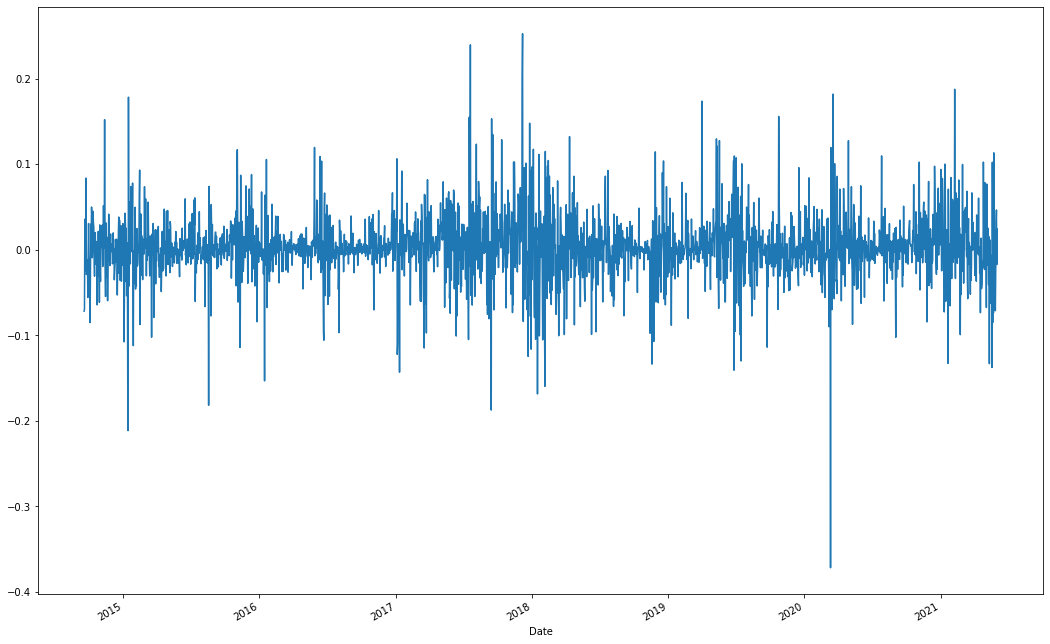

In [6]:
# Calculate and plot daily returns
returns_daily = data.pct_change()
returns_daily.plot(figsize=(18, 12), subplots=True);

In [7]:
# Calculate and plot monthly returns (from LAST day of each mth)
prices_BOM = data.resample("BMS").last()
ind_return = prices_BOM.pct_change()
ind_return

Date
2014-09-01         NaN
2014-10-01   -0.157780
2014-11-03    0.160038
2014-12-01   -0.153034
2015-01-01   -0.291140
                ...   
2021-02-01    0.363088
2021-03-01    0.305311
2021-04-01   -0.038829
2021-05-03   -0.340771
2021-06-01    0.006491
Freq: BMS, Name: Adj Close, Length: 82, dtype: float64

In [8]:
# Format datetime index
ind_return.index = pd.to_datetime(ind_return.index, format="%Y%m").to_period('M')
ind_return.index.name='Meses'

In [9]:
# sort result
ind_return.sort_values(ascending=True)

Meses
2018-11   -0.344708
2018-03   -0.341768
2021-05   -0.340771
2015-01   -0.291140
2018-01   -0.277987
             ...   
2017-11    0.582091
2019-05    0.633976
2017-08    0.635768
2017-05    0.696288
2014-09         NaN
Freq: M, Name: Adj Close, Length: 82, dtype: float64

In [10]:
# filter by may month
df_ret_mai = ind_return[ind_return.index.month == 5]
df_ret_mai

Meses
2015-05   -0.025218
2016-05    0.175958
2017-05    0.696288
2018-05   -0.188991
2019-05    0.633976
2020-05    0.092683
2021-05   -0.340771
Freq: M, Name: Adj Close, dtype: float64

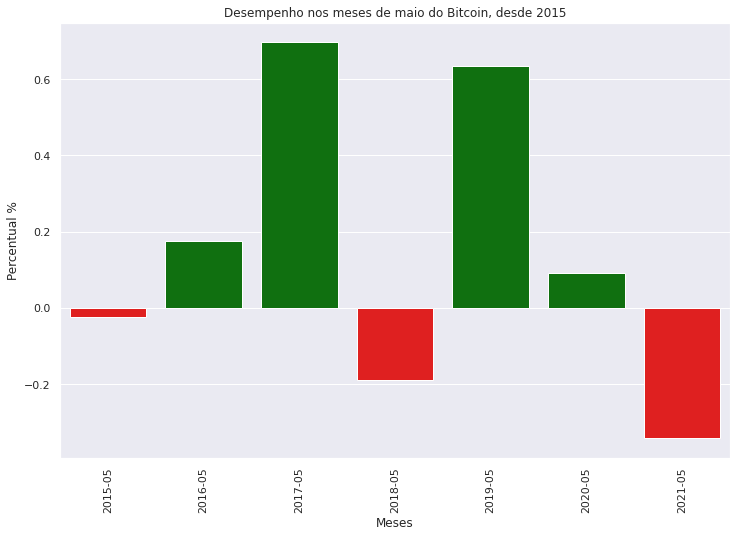

In [17]:
values = df_ret_mai.values
idx = df_ret_mai.index

mytitle = "Desempenho nos meses de maio do {moeda}, desde {ano}".format(moeda="Bitcoin", ano="2015")
plt.title(mytitle)
plt.ylabel('Percentual %')
plt.xticks(rotation=90)

clrs = ['red' if (x < 0) else 'green' for x in values ]
sns.set(rc={'figure.figsize':(12, 8)})
sns.barplot(x=idx, y=values, palette=clrs);

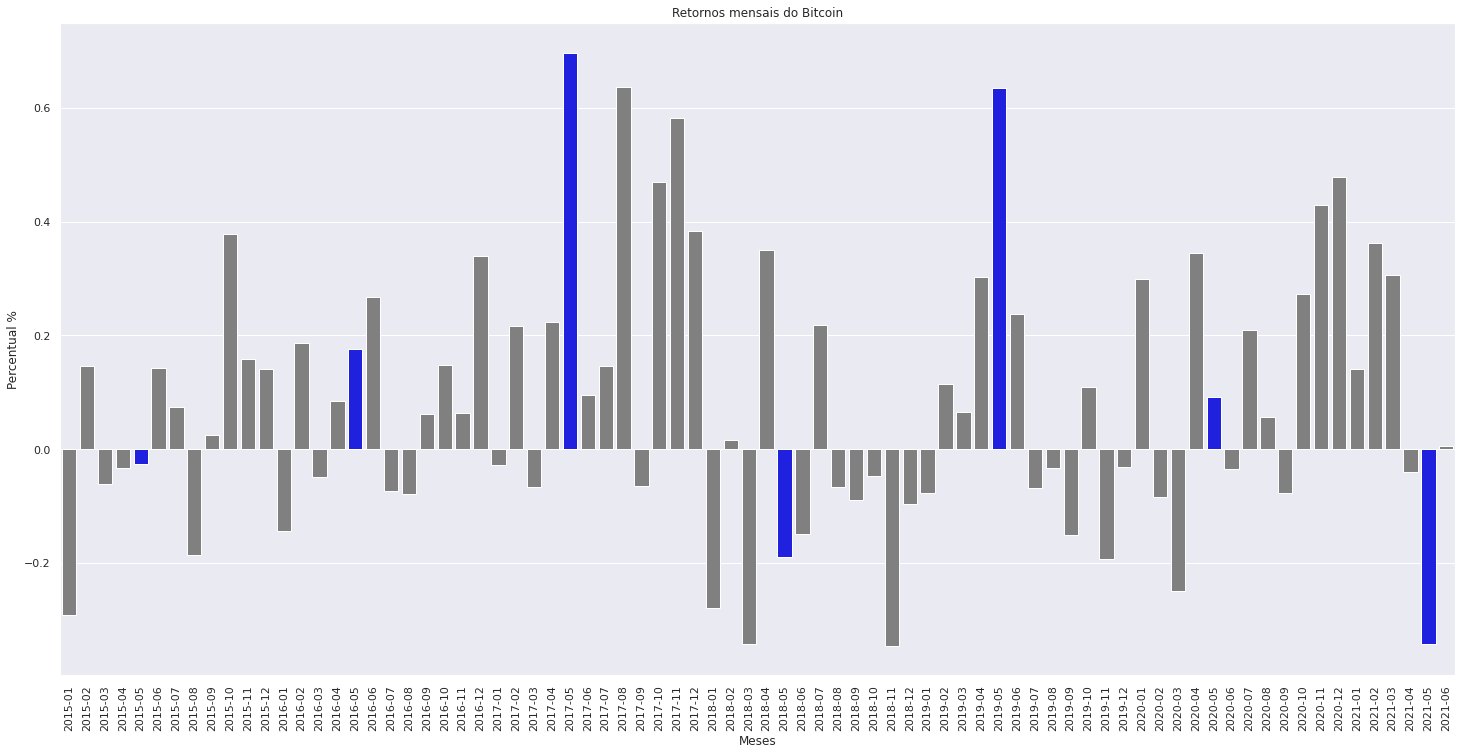

In [15]:
values_tot = ind_return["2015":].values
idx_tot = ind_return["2015":].index

mytitle = "Retornos mensais do Bitcoin".format(
    moeda="Bitcoin", ano="2015")
plt.title(mytitle)

plt.ylabel('Percentual %')
#bars = plt.bar(range(len(X)), Y, 0.6, tick_label = X, color="green") 
plt.xticks(rotation=90)

clrs = ['blue' if (x.month == 5) else 'gray' for x in idx_tot ]
sns.set(rc={'figure.figsize':(25, 12)})
sns.barplot(x=idx_tot, y=values_tot, palette=clrs);